# Exercise 1

The **aims** of this exercise are:

*   Allow you practice slicing and analysing data with Pandas
*   Introduce you to the MovieLens dataset
*   Demonstrate use of Pandas to perform non-personalised and personalised recommendations

This exercise is worth 5% of the contribution to your final mark for RecSys (H) and 3% for RecSys (M), and is expected to take approximately 5-7 hours of your time. NB: This is an individual exercise.



In [1]:
#Standard setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

sns.set_theme()

#Part A. MovieLens Exploration using Pandas

This exercise will use the [Movielens](https://grouplens.org/datasets/movielens/) data. There is a large dataset with 25M ratings, however we will focus on the smallest one, that has only 100k ratings.  

**Hint** : If you are using Colab, it might be good if you open these files, either on your own machine, or using Colab's inbuilt CSV viewer (via folder icon on the left hand sidebar). The CSV files are small enough to be searched using your favourite editor.

In [2]:
# !curl -o ml-latest-small.zip http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
# backup location
#!curl -o ml-latest-small.zip http://www.dcs.gla.ac.uk/~craigm/recsysHM/ml-latest-small.zip

# !unzip -o ml-latest-small.zip

Let's look into the files using Pandas:

In [3]:
ratings_df = pd.read_csv("ml-latest-small/ratings.csv")
movies_df = pd.read_csv("ml-latest-small/movies.csv")

# we're going to treat userId as strings, and similarly as movies. This will prevent confusion later on.
ratings_df['userId'] = "u" + ratings_df['userId'].astype(str)
ratings_df['movieId'] = "m" + ratings_df['movieId'].astype(str)
movies_df['movieId'] = "m" +  movies_df['movieId'].astype(str)

In [4]:
ratings_df

,userId,movieId,rating,timestamp
0,u1,m1,4.0,964982703
1,u1,m3,4.0,964981247
2,u1,m6,4.0,964982224
3,u1,m47,5.0,964983815
4,u1,m50,5.0,964982931
...,...,...,...,...
100831,u610,m166534,4.0,1493848402
100832,u610,m168248,5.0,1493850091
100833,u610,m168250,5.0,1494273047
100834,u610,m168252,5.0,1493846352


`ratings_df` is a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). Viewing it, we can see users (identified by userId) are rating various movies (cf. movieId).

We can slice and dice the dataframes, e.g.:

 * project a single column (this returns a [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)).

In [5]:
movies_df["title"].head(5)

0                      Toy Story (1995)
1                        Jumanji (1995)
2               Grumpier Old Men (1995)
3              Waiting to Exhale (1995)
4    Father of the Bride Part II (1995)
Name: title, dtype: object

 - project multiple columns (this returns a view of the original DataFrame, as another DataFrame object).

In [6]:
movies_df[["movieId", "title"]].head(5)

,movieId,title
0,m1,Toy Story (1995)
1,m2,Jumanji (1995)
2,m3,Grumpier Old Men (1995)
3,m4,Waiting to Exhale (1995)
4,m5,Father of the Bride Part II (1995)


 - Select rows based on one or more conditions

In [7]:
ratings_df[(ratings_df["userId"] == 'u500') & (ratings_df["rating"] == 1)]

,userId,movieId,rating,timestamp
79908,u500,m11,1.0,1005528017
79909,u500,m39,1.0,1005527926
79910,u500,m101,1.0,1005527980
79915,u500,m231,1.0,1005528039
79923,u500,m449,1.0,1005528017
79924,u500,m471,1.0,1005528017
79926,u500,m539,1.0,1005527980
79931,u500,m597,1.0,1005527980
79934,u500,m745,1.0,1005528205
79939,u500,m1188,1.0,1005528065




Let's practice a bit more with Pandas. You can also refer to the [Pandas Dataframe API documentation.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

Write code to answer the following questions:

## Task 1. How many users are there in this dataset?


In [8]:
num_users = len(ratings_df['userId'].unique())
num_users

610

## Task 2. What is the average rating of *each user*?

The output should be a Pandas Series containing an average rating for each of the users.

Hint: Use a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) on the ratings_df dataframe. [Aggregation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation) will also be useful.


In [9]:
average_each_user = ratings_df.groupby('userId')['rating'].mean()
average_each_user['u200']

3.809880239520958

## Task 3. What is the average count of ratings per-user?

In contrast to Task 2, the solution is a single number.

Many solutions will involve [GroupBy.count()](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation).

In [10]:
average_ratings_per_user = ratings_df.groupby('userId')['rating'].count().mean()
average_ratings_per_user

165.30491803278687

## Analysing users's preferences.

Let's try something else. We can see what movies a given user has rated by "merging" the two dataframes - this equates to a JOIN in SQL. Let's do this for userId 556.


In [11]:
pd.merge(
    ratings_df[ratings_df["userId"]=='u556'],
    movies_df,
    on=["movieId"]).sort_values(by="rating", ascending=False).head(5)

,userId,movieId,rating,timestamp,title,genres
0,u556,m588,5.0,1534321062,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
2,u556,m4896,5.0,1534320962,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy
27,u556,m112852,5.0,1534321287,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi
21,u556,m76093,5.0,1534320965,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
3,u556,m4993,4.5,1534320935,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy


It appears that this user is interested in adventure/fantasies movies.

NB: If the columns we are joining on dont have the same name, we can specify `left_on` and `right_on` attributes. See also the  [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) documentation.

## Task 4. Analysing movie categories

Lets examine two particular users a bit more, u556 and u7.

 - How many movies with "Fantasy" genre have u556 rated positively ($\geq 4$)?

 - How many movies with "Fantasy" genre have u7 rated positively ($\geq 4$)?

 - Consider all of u556's ratings. What percentage of all these ratings are positive ratings ($\geq 4$) and are for movies belonging to the "Fantasy" genre?

Hints:
 - Pandas Series has a useful `str.contains()` function:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
 - Pandas dataframes respond to `len()` as you would expect.

In [12]:
uchosen_merged = pd.merge(ratings_df[ratings_df['userId'] == 'u7'], 
                          movies_df, 
                          on=['movieId'])

uchosen_fantasy = uchosen_merged[uchosen_merged['genres'].str.contains("Fantasy")]
uchosen_positive = uchosen_fantasy[uchosen_fantasy['rating'] >= 4]

uchosen_positive.shape[0]

11

In [13]:
u_movies = pd.merge(ratings_df[np.logical_or(ratings_df["userId"] == "u556", ratings_df["userId"] == "u7")],
                       movies_df,
                       on=["movieId"])

combined_positive_fancy = len(u_movies[np.logical_and(u_movies["genres"].str.contains("Fantasy"), u_movies["rating"] >= 4)])
all_u556_ratings = u_movies[u_movies["userId"] == "u556"]
positive_ratings = all_u556_ratings[all_u556_ratings["rating"] >= 4]
percentage_positive = (len(positive_ratings)/len(all_u556_ratings)) * 100

fantasy_ratings = all_u556_ratings[all_u556_ratings["genres"].str.contains("Fantasy")]
positive_fantasy_ratings = fantasy_ratings[fantasy_ratings['rating'] >= 4]
percentage_fantasy = (len(fantasy_ratings) / len(all_u556_ratings)) * 100
percentage_positive_fantasy = (len(positive_fantasy_ratings) / len(all_u556_ratings)) * 100 

# Q7 Percentage of movie ratings which are positive fantasy ratings

print(f"Films rated from u557 and u7 with ratings >= 4: {combined_positive_fancy}")
print(f"Percentage of ratings which are positive from u556: {percentage_positive:.2f}")
print(f"Percentage of ratings which are about Fantasy films from u556: {percentage_fantasy:.2f}")
print(f"Percentage of positive ratings which are about Fantasy films from u556: {percentage_positive_fantasy:.2f}")

Films rated from u557 and u7 with ratings >= 4: 33
Percentage of ratings which are positive from u556: 84.38
Percentage of ratings which are about Fantasy films from u556: 81.25
Percentage of positive ratings which are about Fantasy films from u556: 68.75


# Part B. Popularity-based Recomendation

Now let's examine the ratings of movies.

We can get a dataframe containing the number of times a movie has been rated by applying a groupby and aggregation of the ratings_df.


In [14]:
groupingCountSeries = ratings_df[["movieId", "rating"]].groupby(["movieId"]).count()
groupingCountSeries[groupingCountSeries.rating<25]

,rating
movieId,
m100,14
m100044,1
m100068,1
m100083,3
m100106,1
...,...
m99853,1
m999,12
m99910,2


## Task 5. Plot the distribution of movie ratings.

Use Matplotlib's histogram function to plot the distribution of movie ratings from the `groupingCountSeries` dataframe. This will produce a bar chart with 'binned' counts.

Hints:
- apply a logarithmic scale for the y-axis, using matplotlib's `log=True` option.
- Allow matplotlib to use its default number of bins (which is 10).
- Matplotlib has a [`savefig()`](https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/#the-savefig-method) function for saving a PNG of a figure.

Marks will be lost for poor quality graphs, lacking in typical best practices. You will need to analyse this graph in the quiz.

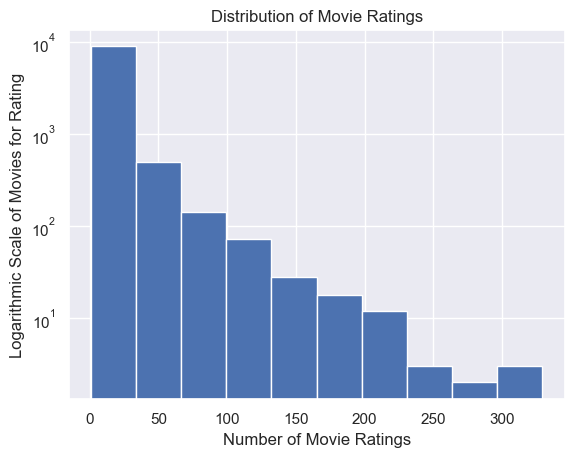

In [15]:
plt.hist(groupingCountSeries, log=True)
plt.title("Distribution of Movie Ratings")
plt.ylabel("Logarithmic Scale of Movies for Rating")
plt.xlabel("Number of Movie Ratings")
# plt.savefig("results/movie_distribution.png")
plt.show()


## Task 6. Find the names of *all* of the movies that have the highest *average* ratings

You should return a dataframe containing the ids and names of the movies, their average ratings, and the number of ratings. NB: You may need to analyse this dataframe further to answer the questions in the quiz.

Hints:
 - Try a [groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Once you have a Series with columns [movieId, meanRating], identify the highest value of meanRating. You can then merge this with the movies_df.
 - If the column we are trying to merge on is an index, we can use  `left_index=True` or `right_index=True` in the [pd.merge()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html).


In [16]:
## Checking that no user has rated the same movie twice. 
movie_and_user_df = ratings_df.groupby(['movieId', 'userId']).agg(count=('rating', 'count'))
assert movie_and_user_df[movie_and_user_df['count'] > 1].shape[0] == 0

In [17]:
ratings_count_df = ratings_df.groupby("movieId").agg(count=("rating", "count"), mean_rating=("rating", "mean"))
ratings_count_df.reset_index(inplace=True)

movieId = 'm6442'
chosen_film_df = ratings_count_df[ratings_count_df['movieId'] == movieId]
chosen_film_df

,movieId,count,mean_rating
7301,m6442,2,5.0


In [18]:
# Finding number of ratings for movies with high average ratings
high_rating = 4.0 

movies_among_highest = pd.merge(ratings_count_df[ratings_count_df["mean_rating"] >= high_rating],
                               movies_df,
                               on="movieId").sort_values(by="count", ascending=False)
high_rating_counts = movies_among_highest['count'].sum()
print(f"Mean number of ratings for a high-rated movie: {high_rating_counts / movies_among_highest.shape[0]:.2f}")

# Finding number of ratings for movies with low average ratings
movies_low_ratings = pd.merge(ratings_count_df[ratings_count_df["mean_rating"] < high_rating],
                               movies_df,
                               on="movieId").sort_values(by="count", ascending=False)
low_rating_counts = movies_low_ratings['count'].sum()
print(f"Mean number of ratings for a low-rated movie: {low_rating_counts / movies_low_ratings.shape[0]:.2f}")

Mean number of ratings for a high-rated movie: 8.17
Mean number of ratings for a low-rated movie: 11.04


In [19]:
highest_mean_rating = ratings_count_df["mean_rating"].max()

max_ratings_df = ratings_count_df[ratings_count_df["mean_rating"] == highest_mean_rating]
movies_with_highest = pd.merge(max_ratings_df,
                               movies_df,
                               on="movieId").sort_values(by="count", ascending=False)
movies_with_highest.shape[0]

296

You can now answer the questions in the quiz for Task 6, based on your  observations on analysing this table?

# Part C - Association Rules and Lift

I think we can do better than simply examining movie popularity.

Lets take all of the positive ratings (4 or 5) to find the most popular pairs of movies that users have watched. We'll consider these are "successful movie watches" of these users.

There is a lot going on there, so please take the time to break it down to understand what it does.

NB: In this code, we perform a "self-join" on a dataframe. If this is unfamiliar, you can read more at:
 - https://dfrieds.com/data-analysis/self-join-python-pandas.html
 - https://www.w3schools.com/sql/sql_join_self.asp



In [20]:
positives = ratings_df[ratings_df["rating"]>=4]

# join positives with itself on userId to get all distinct pairs of movies watched by a given user.
pairs = pd.merge(positives, positives, on=["userId"])
pairs = pairs[ pairs["movieId_x"] != pairs["movieId_y"] ]

# we only want A->B, not B->A. Use the timestamps to restrict the selected pairs such that
# one movie is rated after the other movie, OR if the timestampes are tied, we break such
# a tie by movieId. Bitwise operators & and | are used for combining Pandas series containing booleans
sequences = pairs[
                  (pairs["timestamp_x"] < pairs["timestamp_y"])
                  |
                  (
                      (pairs["timestamp_x"] == pairs["timestamp_y"])
                      &
                      (pairs["movieId_x"] < pairs["movieId_y"])
                  )
                  ]

# lets count the frequency of each pair of movies. As a user can only rate a movie once, you can
# also think of this as the number of users that have watched each pair of movies.
paircounts = sequences[["movieId_x", "movieId_y", "userId"]].groupby(["movieId_x", "movieId_y"]).count()

# sort by the most popular pairs.
pairswithcounts = paircounts.reset_index().rename(columns={"userId" : "count"}).sort_values(['count'], ascending=False)

# display the top most frequent pairs
pairswithcounts.head()

,movieId_x,movieId_y,count
1579647,m318,m356,112
1580428,m318,m527,98
1421549,m296,m593,95
1420937,m296,m47,92
1191679,m260,m1196,91


## Task 7. Display the titles of the (most popular) movie pairs from `pairswithcounts`

You will need to analyse this dataframe to complete the questions in the quiz.

Hint:
 - you will need to re-sort after a pd.merge()

In [21]:
x_merged_df = pd.merge(pairswithcounts,
            movies_df[['movieId', 'title']],
            left_on=['movieId_x'], right_on=['movieId']) \
            .drop(columns=['movieId'])\
            .rename(columns={'title':'title_x'})

both_merged_df = pd.merge(x_merged_df,
              movies_df[['movieId', 'title']],
              left_on=['movieId_y'], right_on=['movieId'])\
                .drop(columns=['movieId'])\
                .rename(columns={'title':'title_y'})

pairstitles_df = both_merged_df.sort_values(by='count', ascending=False)
pairstitles_df.head(5)

,movieId_x,movieId_y,count,title_x,title_y
0,m318,m356,112,"Shawshank Redemption, The (1994)",Forrest Gump (1994)
2141,m318,m527,98,"Shawshank Redemption, The (1994)",Schindler's List (1993)
4194,m296,m593,95,Pulp Fiction (1994),"Silence of the Lambs, The (1991)"
17826,m296,m47,92,Pulp Fiction (1994),Seven (a.k.a. Se7en) (1995)
24736,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back...


In [22]:
pairstitles_df[pairstitles_df['count'] == 74]

,movieId_x,movieId_y,count,title_x,title_y
88052,m858,m1221,74,"Godfather, The (1972)","Godfather: Part II, The (1974)"


## Task 8. Calculate Lift (see Lecture 3) for all pairs in `paircounts`.  

Now you should calculate Lift. You will need to carefully consider your event space, guided by Lecture 3.

Your target dataframe should have columns:
 - movieId_x	movieId_y
 - count - number of users that have positively rated both movies x and y.
 - ratingCount_x	ratingCount_y	- number of users that have positively rated these movies in total.
 - lift	- your calculated lift.
 - title_x, title_y, genre_x and genre_y - metadata about the films, so you know if you have success.

Hints:
 - You will need to join `pairswithcounts` with a dataframe containing rating counts of individual movies. A calculated column will be needed. See https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html or https://stackoverflow.com/a/12377083/9989050 for hints on how to achieve that.
 - If you come across duplicated columns in your solution, you can use this trick https://stackoverflow.com/a/40435354/9989050 to get rid of them.
 - You should [sort](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) your dataframe.

Below I provide the highest lift movies for you to check your solution.


In [23]:
positive_ratings_df = positives.groupby('movieId').agg(ratingCount=("userId", "count"))
positive_ratings_df.reset_index(inplace=True)
positive_ratings_df.head(5)

,movieId,ratingCount
0,m1,147
1,m10,59
2,m100,1
3,m100044,1
4,m100083,1


In [24]:
x_metadata_df = pd.merge(pairswithcounts,
            movies_df[['movieId', 'title', 'genres']],
            left_on=['movieId_x'], right_on=['movieId']) \
            .drop(columns=['movieId'])\
            .rename(columns={'title':'title_x', 'genres':'genre_x'})

metadata_merged_df = pd.merge(x_metadata_df,
              movies_df[['movieId', 'title', 'genres']],
              left_on=['movieId_y'], right_on=['movieId'])\
                .drop(columns=['movieId'])\
                .rename(columns={'title':'title_y', 'genres':'genre_y'})

metadata_df = metadata_merged_df.sort_values(by='count', ascending=False)
metadata_df.head(5)

,movieId_x,movieId_y,count,title_x,genre_x,title_y,genre_y
0,m318,m356,112,"Shawshank Redemption, The (1994)",Crime|Drama,Forrest Gump (1994),Comedy|Drama|Romance|War
2141,m318,m527,98,"Shawshank Redemption, The (1994)",Crime|Drama,Schindler's List (1993),Drama|War
4194,m296,m593,95,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
17826,m296,m47,92,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
24736,m260,m1196,91,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


In [25]:
metadata_x_ratings_df = pd.merge(metadata_df,
            positive_ratings_df.rename(columns={'movieId':'movieId_x'}),
            on='movieId_x').rename(columns={'ratingCount': 'ratingCount_x'})

metadata_ratings_df = pd.merge(metadata_x_ratings_df,
            positive_ratings_df.rename(columns={'movieId':'movieId_y'}),
            on='movieId_y').rename(columns={'ratingCount': 'ratingCount_y'})

metadata_ratings_df = metadata_ratings_df[['movieId_x', 'movieId_y', 'count',
                    'ratingCount_x', 'ratingCount_y', 
                    'title_x', 'title_y',
                    'genre_x', 'genre_y']]

metadata_ratings_df.head(5)

,movieId_x,movieId_y,count,ratingCount_x,ratingCount_y,title_x,title_y,genre_x,genre_y
0,m318,m356,112,274,249,"Shawshank Redemption, The (1994)",Forrest Gump (1994),Crime|Drama,Comedy|Drama|Romance|War
1,m296,m356,88,244,249,Pulp Fiction (1994),Forrest Gump (1994),Comedy|Crime|Drama|Thriller,Comedy|Drama|Romance|War
2,m260,m356,49,201,249,Star Wars: Episode IV - A New Hope (1977),Forrest Gump (1994),Action|Adventure|Sci-Fi,Comedy|Drama|Romance|War
3,m2571,m356,77,222,249,"Matrix, The (1999)",Forrest Gump (1994),Action|Sci-Fi|Thriller,Comedy|Drama|Romance|War
4,m4993,m356,38,146,249,"Lord of the Rings: The Fellowship of the Ring,...",Forrest Gump (1994),Adventure|Fantasy,Comedy|Drama|Romance|War


In [26]:
total_single_ratings = positives.shape[0]
total_pairs = pairswithcounts['count'].sum()

def calculate_lift(paircount, rc_x, rc_y):
    p_x = rc_x / total_single_ratings
    p_y = rc_y / total_single_ratings
    p_x_y = paircount / total_pairs
    return p_x_y / (p_x * p_y) 

In [27]:
lift_df = metadata_ratings_df.copy()
lift_df['lift'] = lift_df.apply(lambda r: calculate_lift(r['count'],
                                                         r.ratingCount_x,
                                                         r.ratingCount_y), axis=1)

lift_df = lift_df[['movieId_x', 'movieId_y', 'count',
                    'ratingCount_x', 'ratingCount_y', 'lift',
                    'title_x', 'title_y',
                    'genre_x', 'genre_y']]

lift_df = lift_df.sort_values(by='lift', ascending=False)

In [28]:
lift_df.head(5)

,movieId_x,movieId_y,count,ratingCount_x,ratingCount_y,lift,title_x,title_y,genre_x,genre_y
3540436,m130490,m114265,1,1,1,425.272163,Insurgent (2015),Laggies (2014),Action|Sci-Fi|Thriller,Comedy|Romance
3027402,m2751,m8119,1,1,1,425.272163,From the Hip (1987),Crossroads (1986),Comedy|Drama,Drama
3027405,m6974,m8119,1,1,1,425.272163,"Freshman, The (1990)",Crossroads (1986),Comedy|Crime,Drama
3027406,m6816,m8119,1,1,1,425.272163,Three O'Clock High (1987),Crossroads (1986),Comedy,Drama
3027408,m6567,m8119,1,1,1,425.272163,Buffalo Soldiers (2001),Crossroads (1986),Comedy|Crime|Drama|War,Drama


In [32]:
lift_df[(lift_df["movieId_x"] == "m91500") & (lift_df["movieId_y"] == "m106487")]

,movieId_x,movieId_y,count,ratingCount_x,ratingCount_y,lift,title_x,title_y,genre_x,genre_y
981256,m91500,m106487,10,24,14,12.65691,The Hunger Games (2012),The Hunger Games: Catching Fire (2013),Action|Adventure|Drama|Sci-Fi|Thriller,Action|Adventure|Sci-Fi|IMAX


If your solution is correct, you will see the highest lift movie pairs.
Let's check them - do the highest lift movies pairs make sense? e.g. "Pink Panther, The (2006)" (Adventure|Comedy|Crime) with	"For Richer or Poorer (1997)" (Comedy).

It should be clear that these lift pairs do not have high support.

## Task 9 - Support Thresholds


We can make more meaningful recommendations using Lift if we apply a Support threshold. For instance, we can remove movie pairs with support count $< 10$.

So in essence, we can use lift to identify highly co-occurring movie pairs without resorting to any collaborative notions.

Keep this dataframe around - you will need it to answer the questions for Task 9 in the quiz.

In [30]:
support_thresholded_df = lift_df[lift_df["count"] >= 10]
support_thresholded_df = support_thresholded_df.sort_values(by="lift", ascending=False)
support_thresholded_df.head(5)

,movieId_x,movieId_y,count,ratingCount_x,ratingCount_y,lift,title_x,title_y,genre_x,genre_y
1037652,m91500,m116823,11,24,15,12.994427,The Hunger Games (2012),The Hunger Games: Mockingjay - Part 1 (2014),Action|Adventure|Drama|Sci-Fi|Thriller,Adventure|Sci-Fi|Thriller
981256,m91500,m106487,10,24,14,12.656910,The Hunger Games (2012),The Hunger Games: Catching Fire (2013),Action|Adventure|Drama|Sci-Fi|Thriller,Action|Adventure|Sci-Fi|IMAX
607892,m115713,m139385,10,20,19,11.191373,Ex Machina (2015),The Revenant (2015),Drama|Sci-Fi|Thriller,Adventure|Drama
829323,m91658,m67255,10,24,19,9.326144,"Girl with the Dragon Tattoo, The (2011)","Girl with the Dragon Tattoo, The (Män som hata...",Drama|Thriller,Crime|Drama|Mystery|Thriller
862831,m34162,m8807,10,25,19,8.953098,Wedding Crashers (2005),Harold and Kumar Go to White Castle (2004),Comedy|Romance,Adventure|Comedy


I got the "The Hunger Games (2012)" paired with "The Hunger Games: Mockingjay - Part 1 (2014)" as the movie pair with the highest lift. This seems a good pairing!

# End of Exercise

As part of your submission, you should complete the Exercise 1 quiz on Moodle.
You will need to upload your notebook, complete with the **results** of executing the code.